In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl

In [9]:
# list files in directory
path = os.getcwd()
os.listdir(path)


['extratos.ipynb', 'xp']

In [10]:
path_xp = path + '/xp'
xp_list  = os.listdir(path_xp)
xp_list

['Extrato 3112581 JAN 2019 a DEC 2022 - Mock.xlsx',
 'Extrato 3112581 JAN 2019 a DEC 2022.xlsx',
 'Extrato 3112581 JAN 2023 a APR 2023.xlsx']

In [11]:
df = pd.DataFrame()
for file in xp_list:
    # read workbook
    wb = openpyxl.load_workbook(path_xp + '/' + file)
    ws = wb.active

    # read data
    data = ws.values

    start_range = 'b15'

    # find next empty row in column B
    for row in ws.iter_rows(min_row=14, min_col=2, max_col=2):
        for cell in row:
            if cell.value is None:
                end_row = cell.row
                break

    end_range = 'G' + str(end_row)

    data = ws[start_range:end_range]
    # append cels to dataframe
    for row in data:
        row_data = []
        for cell in row:
            row_data.append(cell.value)
        if row_data[0] is None:
            break
        data_dict = {'Movimentação': row_data[0],
                    'Liquidação': row_data[1],
                    'Lançamento': row_data[2],
                        'Valor': row_data[4],
                        'Saldo': row_data[5]}
            # append dict data to dataframe
        df = pd.concat([df, pd.DataFrame(data_dict, index=[0])], ignore_index=True)

In [12]:
df

,Movimentação,Liquidação,Lançamento,Valor,Saldo
0,2022-12-29,2022-12-29,JUROS S/ CAPITAL DE CLIENTES BBAS3 S/ ...,22.61,1023.81
1,2022-12-23,2022-12-23,RENDIMENTOS DE CLIENTES XPML11 S/ 30,23.10,1001.20
2,2022-12-23,2022-12-23,RENDIMENTOS DE CLIENTES BTLG11 S/ 40,29.60,978.10
3,2022-12-19,2022-12-19,RENDIMENTOS DE CLIENTES VGIP11 S/ 41,18.45,948.50
4,2022-12-19,2022-12-19,RENDIMENTOS DE CLIENTES MCCI11 S/ 35,38.50,930.05
...,...,...,...,...,...
505,2023-01-02,2023-01-02,TAXA SEMESTRAL TESOURO DIRETO - CBLC,-8.19,988.56
506,2023-01-02,2023-01-02,TAXA SEMESTRAL TESOURO DIRETO - CBLC,-15.85,996.75
507,2023-01-02,2023-01-02,TAXA SEMESTRAL TESOURO DIRETO - CBLC,-3.08,1012.60
508,2023-01-02,2023-01-02,TAXA SEMESTRAL TESOURO DIRETO - CBLC,-10.57,1015.68


In [13]:
#adding labels
def in_out(x):
    if x < 0:
        return 'out'
    else:
        return 'in'

def labels(x):
    # if x contais "Rendimentos" return "Rendimentos"
    if 'RENDIMENTOS' in x:
        label =  'Rendimentos'
    elif 'JUROS S/ CAPITAL' in x:
        label = 'Juros sobre capital'
    elif 'DIVIDENDOS' in x:
        label = 'Dividendos'
    elif 'TED' in x:
        label = 'TED'
    elif 'OPERAÇÕES EM BOLSA' in x:
        label = 'Operações em bolsa'
    elif 'COMPRA TESOURO DIRETO' in x:
        label = 'Compra tesouro direto'
    else:
        label = 'Outros'
    return label

df['tipo'] = df['Lançamento'].apply(labels)
df['in/out'] = df['Valor'].apply(in_out)

In [17]:
df_aportes_month

Liquidação
2019-03                                               1100.0
2019-04                                               1100.0
2019-05                                              1941.34
2019-06                                                405.0
2019-07                                               977.84
2019-08                                              1726.69
2019-09                                                920.0
2019-10                                                910.0
2019-12                                                925.0
2020-01                                                940.0
2020-02                                                350.0
2020-03                                                165.0
2020-04                                                350.0
2020-06                                               1260.0
2020-07                                                700.0
2020-08                                               1990.0
2020-10      

C:\Users\guilherme.lawrence_i\AppData\Local\Temp\ipykernel_13084\2999093023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aportes['Valor'] = np.random.randint(1000, 10000, df_aportes.shape[0])


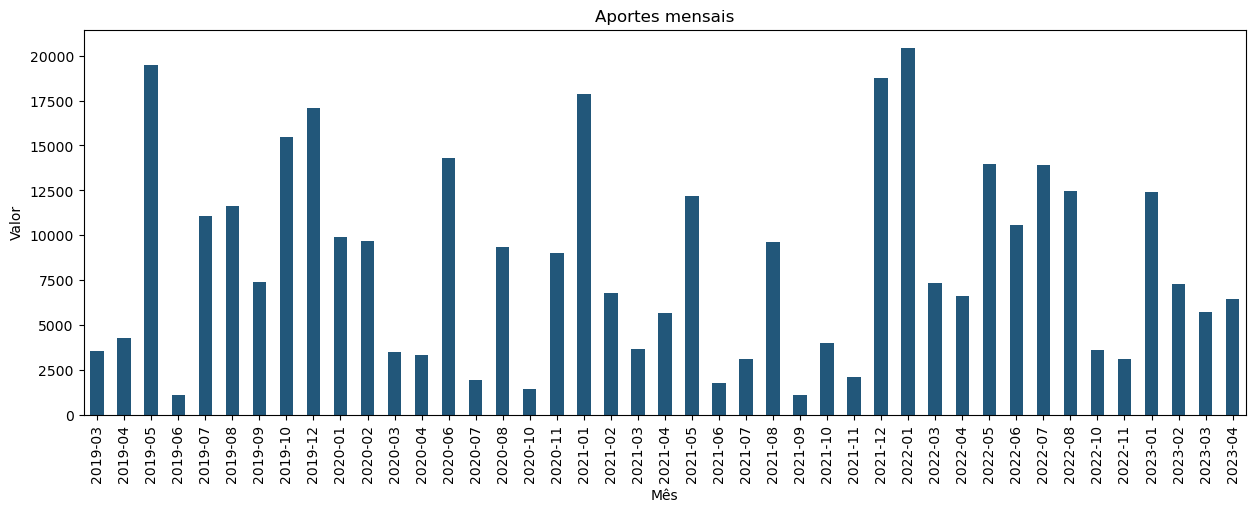

In [20]:
df_aportes = df[(df['tipo'] == "TED") & (df['in/out'] == 'in')]
# randomize data on order to share in social media. Comment next line to get the real data
df_aportes['Valor'] = np.random.randint(1000, 10000, df_aportes.shape[0])

df_aportes_month = df_aportes.groupby(df_aportes['Liquidação'].dt.strftime('%Y-%m'))['Valor'].sum()
# plot as a time series
df_aportes_month.plot(kind='bar', figsize=(15, 5), color='#22577A')
plt.title('Aportes mensais')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.show()

C:\Users\guilherme.lawrence_i\AppData\Local\Temp\ipykernel_13084\2244693298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rendimentos['Valor'] = np.random.randint(1000, 10000, df_rendimentos.shape[0])


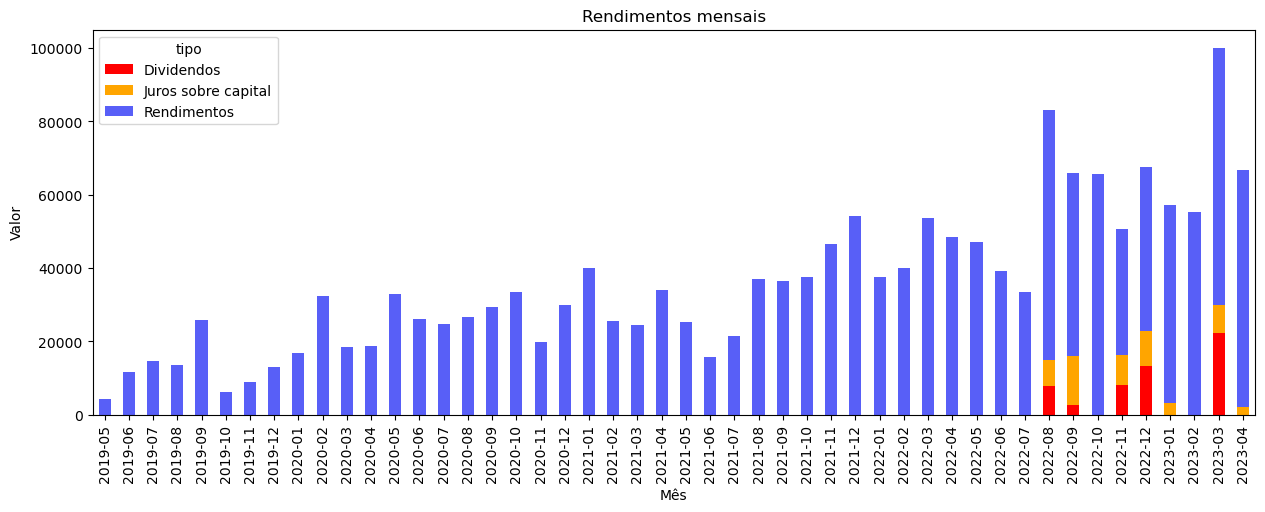

In [22]:
df_rendimentos = df[(df['tipo'].isin(['Rendimentos', 'Juros sobre capital', 'Dividendos'])) & (df['in/out'] == 'in')]
# randomize data on order to share in social media. Comment next line to get the real data
df_rendimentos['Valor'] = np.random.randint(1000, 10000, df_rendimentos.shape[0])
df_rendimentos_month_tipo = df_rendimentos.groupby([df_rendimentos['Liquidação'].dt.strftime('%Y-%m'), 'tipo'])['Valor'].sum()
df_rendimentos_month_tipo.unstack().plot(kind='bar', figsize=(15, 5),stacked=True, color= ['red', 'orange', '#585ff7'])
#hide y axis
plt.title('Rendimentos mensais')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.show()
